### Heatmap Generator for Fig5 Panel A

- takes collection of motif finding results from different timepoints and does some processing before combining them into one dataframe
- heatmap is based on fold change, calculated using the # of target sequences with the motif and the # of background sequences with the motif
- genes used in this heatmap are selected by the ```GENE_LIST``` variable

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

D0 = "raw/D0_knownResults.txt"
D5 = "raw/D5_knownResults.txt"
D10 = "raw/D10_knownResults.txt"
D15 = "raw/D15_knownResults.txt"
D20 = "raw/D20_knownResults.txt"
D25 = "raw/D25_knownResults.txt"
D45 = "raw/D45_knownResults.txt"

OUTPUT_PATH = "out/heatmap.pdf"
GENE_LIST = ["CTCF",
             "Atoh1",
             "NeuroD1",
             "Isl1",
             "OCT4-SOX2-TCF-NANOG",
             "Ascl1",
             "NeuroG2",
             "Olig2",
             "Lhx2",
             "PAX6",
             "DLX2",
             "DLX1",
             "Otx2",
             "CRX",
             "Zic",
             "Zic2",
             "Zic3",
             "Sox4",
             "Sox9",
             "MyoD"
]

In [2]:
all_timepoints = []

df_0 = pd.read_csv(D0, sep='\t')
df_5 = pd.read_csv(D5, sep='\t')
df_10 = pd.read_csv(D10, sep='\t')
df_15 = pd.read_csv(D15, sep='\t')
df_20 = pd.read_csv(D20, sep='\t')
df_25 = pd.read_csv(D25, sep='\t')
df_45 = pd.read_csv(D45, sep='\t')

all_timepoints.append(df_0)
all_timepoints.append(df_5)
all_timepoints.append(df_10)
all_timepoints.append(df_15)
all_timepoints.append(df_20)
all_timepoints.append(df_25)
all_timepoints.append(df_45)

display(all_timepoints)

[                                            Motif Name  \
 0     CTCF(Zf)/CD4+-CTCF-ChIP-Seq(Barski_et_al.)/Homer   
 1        BORIS(Zf)/K562-CTCFL-ChIP-Seq(GSE32465)/Homer   
 2    OCT4-SOX2-TCF-NANOG(POU,Homeobox,HMG)/mES-Oct4...   
 3        Sp5(Zf)/mES-Sp5.Flag-ChIP-Seq(GSE72989)/Homer   
 4    Unknown-ESC-element(?)/mES-Nanog-ChIP-Seq(GSE1...   
 ..                                                 ...   
 435  ZBTB12(Zf)/HEK293-ZBTB12.GFP-ChIP-Seq(GSE58341...   
 436        ZEB1(Zf)/PDAC-ZEB1-ChIP-Seq(GSE64557)/Homer   
 437     ZEB2(Zf)/SNU398-ZEB2-ChIP-Seq(GSE103048)/Homer   
 438  ZNF136(Zf)/HEK293-ZNF136.GFP-ChIP-Seq(GSE58341...   
 439  ZNF416(Zf)/HEK293-ZNF416.GFP-ChIP-Seq(GSE58341...   
 
                      Consensus  P-value  Log P-value  q-value (Benjamini)  \
 0         AYAGTGCCMYCTRGTGGCCA      0.0     -19070.0                  0.0   
 1         CNNBRGCGCCCCCTGSTGGC      0.0     -12130.0                  0.0   
 2              ATTTGCATAACAATG      0.0      -2235.0   

In [3]:
index = 0
for df in all_timepoints:
    genes = []
    gene_types = []

    for i, row in df.iterrows():
        motif = row["Motif Name"]

        # extract gene type
        gene_type = motif.split("(")[1]
        gene_type = gene_type.split(")")[0]
        gene_types.append(gene_type)

        # extract gene name
        gene = motif.split("(")[0]
        genes.append(gene)

    # add columns to df
    df["Gene Type"] = gene_types
    df["Gene"] = genes

    # create new df with only necessary columns
    df_new = df[['Gene', 'Gene Type', '# of Target Sequences with Motif', '# of Background Sequences with Motif']].copy()

    df_new.sort_values(by='Gene', inplace=True)

    df_new = df_new.loc[(df_new['Gene'] == 'CTCF') | 
                        (df_new['Gene'] == 'Atoh1') |
                        (df_new['Gene'] == 'NeuroD1') |
                        (df_new['Gene'] == 'Isl1') |
                        (df_new['Gene'] == 'OCT4-SOX2-TCF-NANOG') |
                        (df_new['Gene'] == 'Ascl1') |
                        (df_new['Gene'] == 'NeuroG2') |
                        (df_new['Gene'] == 'Olig2') |
                        (df_new['Gene'] == 'Lhx2') |
                        (df_new['Gene'] == 'PAX6') |
                        (df_new['Gene'] == 'DLX2') |
                        (df_new['Gene'] == 'DLX1') |
                        (df_new['Gene'] == 'Otx2') |
                        (df_new['Gene'] == 'CRX') |
                        (df_new['Gene'] == 'Zic') |
                        (df_new['Gene'] == 'Zic2') |
                        (df_new['Gene'] == 'Zic3') |
                        (df_new['Gene'] == 'Sox4') |
                        (df_new['Gene'] == 'Sox9') |
                        (df_new['Gene'] == 'MyoD')
    ]

    df_new.set_index('Gene', inplace=True)


    all_timepoints[index] = df_new
    index += 1

    
display(all_timepoints)

[                            Gene Type  # of Target Sequences with Motif  \
 Gene                                                                      
 Ascl1                            bHLH                           39749.0   
 Atoh1                            bHLH                           25806.0   
 CRX                          Homeobox                           49523.0   
 CTCF                               Zf                           16759.0   
 DLX1                         Homeobox                           29837.0   
 DLX2                         Homeobox                           33655.0   
 Isl1                         Homeobox                           40901.0   
 Lhx2                         Homeobox                           23756.0   
 MyoD                             bHLH                           20374.0   
 NeuroD1                          bHLH                           19578.0   
 NeuroG2                          bHLH                           33468.0   
 OCT4-SOX2-T

In [4]:
# calculate FC
for df in all_timepoints:
    fc = []
    for i, row in df.iterrows():
        fc.append(row['# of Target Sequences with Motif'] / row['# of Background Sequences with Motif'])
    
    df['fc'] = fc

display(all_timepoints[6])

,Gene Type,# of Target Sequences with Motif,# of Background Sequences with Motif,fc
Gene,,,,
Ascl1,bHLH,37526.0,26991.5,1.390290
Atoh1,bHLH,31518.0,18339.1,1.718623
CRX,Homeobox,48447.0,46907.5,1.032820
CTCF,Zf,9738.0,1633.8,5.960338
DLX1,Homeobox,37930.0,25846.3,1.467521
DLX2,Homeobox,42348.0,28816.8,1.469559
Isl1,Homeobox,44410.0,33492.4,1.325972
Lhx2,Homeobox,33357.0,20499.9,1.627179
MyoD,bHLH,20780.0,13095.3,1.586829


In [5]:
hm_df = pd.DataFrame(columns=['D0', 'D5', 'D10', 'D15', 'D20', 'D25', 'D45'])
hm_df['D0'] = all_timepoints[0]['fc']
hm_df['D5'] = all_timepoints[1]['fc']
hm_df['D10'] = all_timepoints[2]['fc']
hm_df['D15'] = all_timepoints[3]['fc']
hm_df['D20'] = all_timepoints[4]['fc']
hm_df['D25'] = all_timepoints[5]['fc']
hm_df['D45'] = all_timepoints[6]['fc']

hm_df.to_csv('out/heatmap.csv')
display(hm_df)

,D0,D5,D10,D15,D20,D25,D45
Gene,,,,,,,
Ascl1,1.113917,1.099299,1.112111,1.120948,1.075014,1.109942,1.390290
Atoh1,1.130949,1.111225,1.162521,1.200170,1.136245,1.179624,1.718623
CRX,0.911036,0.961129,0.944915,0.957858,0.947550,0.956536,1.032820
CTCF,7.025656,6.854094,6.929431,6.465714,5.685162,6.556695,5.960338
DLX1,1.119046,1.140749,1.301244,1.296106,1.312504,1.285358,1.467521
DLX2,1.133795,1.156679,1.292730,1.301652,1.312886,1.280470,1.469559
Isl1,1.121233,1.139981,1.217640,1.246351,1.245457,1.213584,1.325972
Lhx2,1.148787,1.172387,1.364243,1.392926,1.385949,1.367499,1.627179
MyoD,1.187995,1.192554,1.216741,1.268073,1.174082,1.219228,1.586829


/Users/manan/environments/iRGC_env/lib/python3.10/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


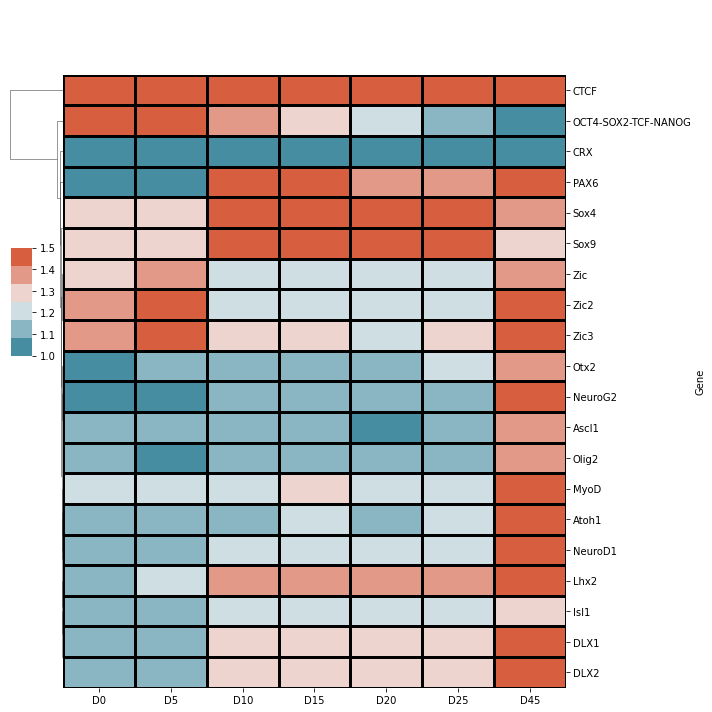

In [6]:
cmap = sns.diverging_palette(220, 20, l=55) # red/blue color scheme

heatmap = sns.clustermap(data=hm_df,
               z_score=None,
               colors_ratio=0.01,
               dendrogram_ratio=.1,
               cbar_pos=(.02,.5,.03,.15),
               vmin=1,
               vmax=1.5,
               yticklabels=True,
               square=True,
               cmap=cmap,
               linewidths = 3.0,
               linecolor = 'black',
               row_cluster=True,
               col_cluster=False
)

plt.savefig(OUTPUT_PATH, dpi=400)